# **Confectionery Sales Forecasting Challenge**


# **Pre Process Steps**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the training data from a CSV file into a DataFrame
train = pd.read_csv('/content/drive/MyDrive/Hackathon/train.csv')

# Read the testing data from a CSV file into a DataFrame
test = pd.read_csv('/content/drive/MyDrive/Hackathon/test.csv')

In [ ]:
train.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57mm,freezers available,outstation,outlet_code_3254,95
1,5/29/2023,8mm,freezers available,outstation,outlet_code_1859,107
2,5/8/2023,170.57mm,freezers available,outstation,outlet_code_4176,83
3,5/22/2023,37mm,freezers available,outstation,outlet_code_1459,106
4,3/27/2023,7mm,freezers available,outstation,outlet_code_38,43


In [ ]:
test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,7/10/2023,144.6mm,freezers available,outstation,outlet_code_1,NaN
1,7/10/2023,114.6mm,freezers available,western,outlet_code_10,NaN
2,7/10/2023,135.48mm,freezers available,western,outlet_code_100,NaN
3,7/10/2023,135.53mm,no freezers available,outstation,outlet_code_1000,NaN
4,7/10/2023,167.37mm,no freezers available,outstation,outlet_code_1001,NaN


In [ ]:
print('Shape of the train set = ',train.shape)

Shape of the train set =  (113400, 6)


In [ ]:
# Checking Null values

print('Total Null values for the train datset = ',train.isnull().sum().sum())

Total Null values for the train datset =  0


In [ ]:
print("Count of Unique freezer_status in Train Dataset:", train['freezer_status'].nunique())
print("Count of Unique outlet_region in Train Dataset:", train['outlet_region'].nunique())
print("Count of Unique outlet_code in Train Dataset:", train['outlet_code'].nunique())


Count of Unique freezer_status in Train Dataset: 4
Count of Unique outlet_region in Train Dataset: 3
Count of Unique outlet_code in Train Dataset: 4200


In [ ]:
print("Unique freezer_status in Train Dataset:", train['freezer_status'].unique())
print("Unique outlet_region in Train Dataset:", train['outlet_region'].unique())
print("Unique outlet_code in Train Dataset:", train['outlet_code'].unique())


Unique freezer_status in Train Dataset: ['  freezers available ' ' no freezers available ' ' freezers available '
 '   freezers available ']
Unique outlet_region in Train Dataset: ['outstation' 'upcountry' 'western']
Unique outlet_code in Train Dataset: ['outlet_code_3254' 'outlet_code_1859' 'outlet_code_4176' ...
 'outlet_code_3224' 'outlet_code_2551' 'outlet_code_3606']


In [ ]:
# Replacing values in freezer_status feature
train['freezer_status'] = train['freezer_status'].replace(['  freezers available ', ' freezers available ', '   freezers available '], 1)
train['freezer_status'] = train['freezer_status'].replace([' no freezers available '], 0)


In [ ]:
# confirmation

print("Count of Unique freezer_status in Train Dataset:", train['freezer_status'].nunique())
print("Unique freezer_status in Train Dataset:", train['freezer_status'].unique())


Count of Unique freezer_status in Train Dataset: 2
Unique freezer_status in Train Dataset: [1 0]


In [ ]:
# Remove mm from expected_rainfall feture

train['expected_rainfall'] = train['expected_rainfall'].str.replace('mm', '').astype(float)


In [ ]:
# confirmation

train.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57.00,1,outstation,outlet_code_3254,95
1,5/29/2023,8.00,1,outstation,outlet_code_1859,107
2,5/8/2023,170.57,1,outstation,outlet_code_4176,83
3,5/22/2023,37.00,1,outstation,outlet_code_1459,106
4,3/27/2023,7.00,1,outstation,outlet_code_38,43


In [ ]:
print(train.dtypes)

week_start_date       object
expected_rainfall    float64
freezer_status         int64
outlet_region         object
outlet_code           object
sales_quantity         int64
dtype: object


In [ ]:
train['week_start_date'] = pd.to_datetime(train['week_start_date'], format='%m/%d/%Y')


In [ ]:
# confirmation

train.head()


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,2023-05-22,57.00,1,outstation,outlet_code_3254,95
1,2023-05-29,8.00,1,outstation,outlet_code_1859,107
2,2023-05-08,170.57,1,outstation,outlet_code_4176,83
3,2023-05-22,37.00,1,outstation,outlet_code_1459,106
4,2023-03-27,7.00,1,outstation,outlet_code_38,43


In [ ]:
train['week_start_date'] = pd.to_datetime(train['week_start_date'])
train['day_of_week'] = train['week_start_date'].dt.dayofweek
train['month'] = train['week_start_date'].dt.month
train['quarter'] = train['week_start_date'].dt.quarter
train['year'] = train['week_start_date'].dt.year



In [ ]:
# confirmation

train.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,day_of_week,month,quarter,year
0,2023-05-22,57.00,1,outstation,outlet_code_3254,95,0,5,2,2023
1,2023-05-29,8.00,1,outstation,outlet_code_1859,107,0,5,2,2023
2,2023-05-08,170.57,1,outstation,outlet_code_4176,83,0,5,2,2023
3,2023-05-22,37.00,1,outstation,outlet_code_1459,106,0,5,2,2023
4,2023-03-27,7.00,1,outstation,outlet_code_38,43,0,3,1,2023


In [ ]:
# Adding a new feature for the week of the month
train['week_of_month'] = train['week_start_date'].dt.day // 7 + 1

In [ ]:
# confirmation

train.head(50)

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month
0,2023-05-22,57.00,1,outstation,outlet_code_3254,95,0,5,2,2023,4
1,2023-05-29,8.00,1,outstation,outlet_code_1859,107,0,5,2,2023,5
2,2023-05-08,170.57,1,outstation,outlet_code_4176,83,0,5,2,2023,2
3,2023-05-22,37.00,1,outstation,outlet_code_1459,106,0,5,2,2023,4
4,2023-03-27,7.00,1,outstation,outlet_code_38,43,0,3,1,2023,4
5,2023-04-10,0.00,1,outstation,outlet_code_2006,56,0,4,2,2023,2
6,2023-03-20,143.31,1,outstation,outlet_code_3795,56,0,3,1,2023,3
7,2023-03-20,138.99,1,outstation,outlet_code_2892,53,0,3,1,2023,3
8,2023-01-02,14.00,1,outstation,outlet_code_1738,59,0,1,1,2023,1
9,2023-04-03,33.00,1,outstation,outlet_code_2189,41,0,4,2,2023,1


Average Weekly Sales Volumes by Outlet Region:
outlet_region
outstation    30.669778
upcountry     21.515503
western       43.271235
Name: sales_quantity, dtype: float64

Correlation between Rainfall and Weekly Sales Volumes: -0.0935959187399799


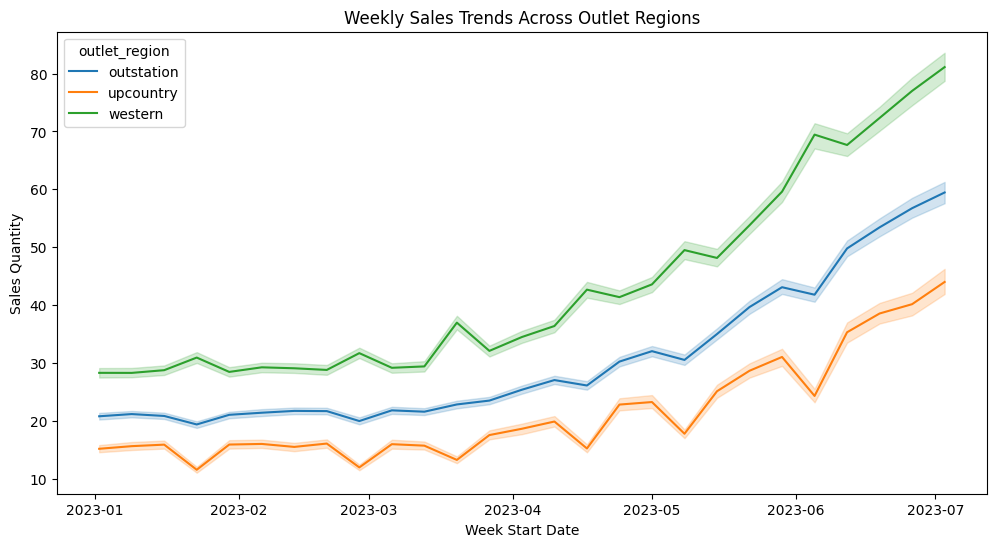

In [ ]:
# Question 1: Average weekly sales volumes for each outlet region
average_sales_by_region = train.groupby('outlet_region')['sales_quantity'].mean()
print("Average Weekly Sales Volumes by Outlet Region:")
print(average_sales_by_region)

# Question 2: Assess the impact of rainfall on weekly sales volumes
correlation_rainfall_sales = train['expected_rainfall'].corr(train['sales_quantity'])
print(f"\nCorrelation between Rainfall and Weekly Sales Volumes: {correlation_rainfall_sales}")

# Question 3: Visualize weekly sales trends across different outlet regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_start_date', y='sales_quantity', hue='outlet_region', data=train)
plt.title('Weekly Sales Trends Across Outlet Regions')
plt.xlabel('Week Start Date')
plt.ylabel('Sales Quantity')
plt.show()


In [ ]:
# confirmation

print("Count of Unique week_of_month in Train Dataset:", train['week_of_month'].nunique())
print("Unique week_of_month in Train Dataset:", train['week_of_month'].unique())


Count of Unique week_of_month in Train Dataset: 5
Unique week_of_month in Train Dataset: [4 5 2 3 1]


In [ ]:
# Checking Null values

print('Total Null values for the train datset = ',train.isnull().sum().sum())

Total Null values for the train datset =  0


In [ ]:
df_encoded = pd.get_dummies(train, columns=['outlet_region'], prefix='outlet_region')

# Print or display the DataFrame with the one-hot encoded 'station' column
print("DataFrame with One-Hot Encoded 'station' column:")
print(df_encoded)

DataFrame with One-Hot Encoded 'station' column:
       week_start_date  expected_rainfall  freezer_status       outlet_code  \
0           2023-05-22              57.00               1  outlet_code_3254   
1           2023-05-29               8.00               1  outlet_code_1859   
2           2023-05-08             170.57               1  outlet_code_4176   
3           2023-05-22              37.00               1  outlet_code_1459   
4           2023-03-27               7.00               1    outlet_code_38   
...                ...                ...             ...               ...   
113395      2023-04-24              61.00               1  outlet_code_2946   
113396      2023-02-20              10.00               1  outlet_code_3671   
113397      2023-06-05              98.28               1  outlet_code_3671   
113398      2023-06-05             120.46               1  outlet_code_2618   
113399      2023-05-01              48.00               1  outlet_code_1163   

  

In [ ]:
df_encoded.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57.00,1,outlet_code_3254,95,0,5,2,2023,4,1,0,0
1,2023-05-29,8.00,1,outlet_code_1859,107,0,5,2,2023,5,1,0,0
2,2023-05-08,170.57,1,outlet_code_4176,83,0,5,2,2023,2,1,0,0
3,2023-05-22,37.00,1,outlet_code_1459,106,0,5,2,2023,4,1,0,0
4,2023-03-27,7.00,1,outlet_code_38,43,0,3,1,2023,4,1,0,0


In [ ]:
print(train.dtypes)

week_start_date      datetime64[ns]
expected_rainfall           float64
freezer_status                int64
outlet_region                object
outlet_code                  object
sales_quantity                int64
day_of_week                   int64
month                         int64
quarter                       int64
year                          int64
week_of_month                 int64
dtype: object


In [ ]:
df=df_encoded
df['outlet_code'] = df['outlet_code'].str.extract(r'(\d+)')

# Convert the extracted part to integer
df['outlet_code'] = df['outlet_code'].astype(int)

# Print or display the updated DataFrame
print("DataFrame with Extracted Outlet Codes:")
df.head(50)


DataFrame with Extracted Outlet Codes:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-05-22,57.00,1,3254,95,0,5,2,2023,4,1,0,0
1,2023-05-29,8.00,1,1859,107,0,5,2,2023,5,1,0,0
2,2023-05-08,170.57,1,4176,83,0,5,2,2023,2,1,0,0
3,2023-05-22,37.00,1,1459,106,0,5,2,2023,4,1,0,0
4,2023-03-27,7.00,1,38,43,0,3,1,2023,4,1,0,0
5,2023-04-10,0.00,1,2006,56,0,4,2,2023,2,1,0,0
6,2023-03-20,143.31,1,3795,56,0,3,1,2023,3,1,0,0
7,2023-03-20,138.99,1,2892,53,0,3,1,2023,3,1,0,0
8,2023-01-02,14.00,1,1738,59,0,1,1,2023,1,1,0,0
9,2023-04-03,33.00,1,2189,41,0,4,2,2023,1,1,0,0


In [ ]:
print(train.dtypes)

week_start_date      datetime64[ns]
expected_rainfall           float64
freezer_status                int64
outlet_region                object
outlet_code                  object
sales_quantity                int64
day_of_week                   int64
month                         int64
quarter                       int64
year                          int64
week_of_month                 int64
dtype: object


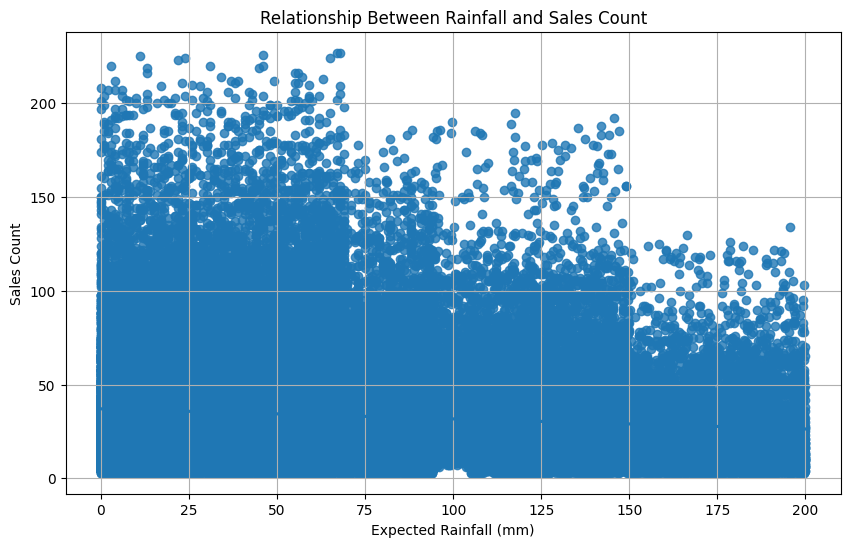

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='expected_rainfall', y='sales_quantity', data=df)
plt.title('Relationship Between Rainfall and Sales Count')
plt.xlabel('Expected Rainfall (mm)')
plt.ylabel('Sales Count')
plt.grid(True)
plt.show()

Average Sales Count by Rainfall Range:
rainfall_range
0-70       35.435021
70-150     32.136117
150-200    23.920886
200+             NaN
Name: sales_quantity, dtype: float64


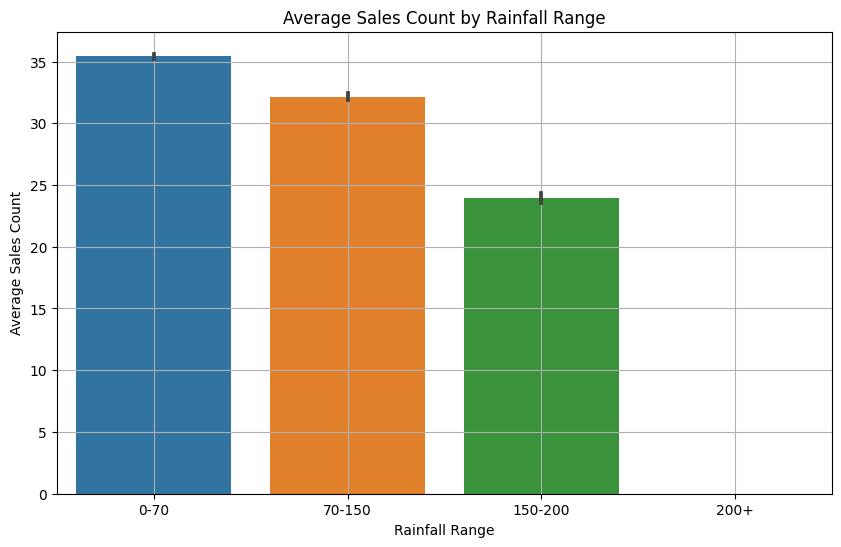

In [ ]:
# Define rainfall bins
bins = [0, 70, 150, 200, float('inf')]  # Adjust the bin edges as needed
labels = ['0-70', '70-150', '150-200', '200+']

# Create a new column 'rainfall_range' with the corresponding labels
df['rainfall_range'] = pd.cut(df['expected_rainfall'], bins=bins, labels=labels, right=False)

# Print average sales count for each rainfall range
average_sales_by_range = df.groupby('rainfall_range')['sales_quantity'].mean()
print("Average Sales Count by Rainfall Range:")
print(average_sales_by_range)

# Plot a bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='rainfall_range', y='sales_quantity', data=df, order=labels)
plt.title('Average Sales Count by Rainfall Range')
plt.xlabel('Rainfall Range')
plt.ylabel('Average Sales Count')
plt.grid(True)
plt.show()

In [ ]:
df.head(50)

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,2023-05-22,57.00,1,3254,95,0,5,2,2023,4,1,0,0,0-70
1,2023-05-29,8.00,1,1859,107,0,5,2,2023,5,1,0,0,0-70
2,2023-05-08,170.57,1,4176,83,0,5,2,2023,2,1,0,0,150-200
3,2023-05-22,37.00,1,1459,106,0,5,2,2023,4,1,0,0,0-70
4,2023-03-27,7.00,1,38,43,0,3,1,2023,4,1,0,0,0-70
5,2023-04-10,0.00,1,2006,56,0,4,2,2023,2,1,0,0,0-70
6,2023-03-20,143.31,1,3795,56,0,3,1,2023,3,1,0,0,70-150
7,2023-03-20,138.99,1,2892,53,0,3,1,2023,3,1,0,0,70-150
8,2023-01-02,14.00,1,1738,59,0,1,1,2023,1,1,0,0,0-70
9,2023-04-03,33.00,1,2189,41,0,4,2,2023,1,1,0,0,0-70


In [ ]:
df = pd.get_dummies(df, columns=['rainfall_range'], prefix='rainfall_range')

# Print or display the DataFrame with the one-hot encoded 'station' column
print("DataFrame with One-Hot Encoded 'rainfall_range' column:")
print(df)

DataFrame with One-Hot Encoded 'rainfall_range' column:
       week_start_date  expected_rainfall  freezer_status  outlet_code  \
0           2023-05-22              57.00               1         3254   
1           2023-05-29               8.00               1         1859   
2           2023-05-08             170.57               1         4176   
3           2023-05-22              37.00               1         1459   
4           2023-03-27               7.00               1           38   
...                ...                ...             ...          ...   
113395      2023-04-24              61.00               1         2946   
113396      2023-02-20              10.00               1         3671   
113397      2023-06-05              98.28               1         3671   
113398      2023-06-05             120.46               1         2618   
113399      2023-05-01              48.00               1         1163   

        sales_quantity  day_of_week  month  quarter  ye

In [ ]:
df.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150-200,rainfall_range_200+
0,2023-05-22,57.00,1,3254,95,0,5,2,2023,4,1,0,0,1,0,0,0
1,2023-05-29,8.00,1,1859,107,0,5,2,2023,5,1,0,0,1,0,0,0
2,2023-05-08,170.57,1,4176,83,0,5,2,2023,2,1,0,0,0,0,1,0
3,2023-05-22,37.00,1,1459,106,0,5,2,2023,4,1,0,0,1,0,0,0
4,2023-03-27,7.00,1,38,43,0,3,1,2023,4,1,0,0,1,0,0,0


In [ ]:
print("Unique day_of_week in df Dataset:", df['day_of_week'].unique())
print("Unique year in df Dataset:", df['year'].unique())
print("Unique rainfall_range_200+ in df Dataset:", df['rainfall_range_200+'].unique())


Unique day_of_week in df Dataset: [0]
Unique year in df Dataset: [2023]
Unique rainfall_range_200+ in df Dataset: [0]


       expected_rainfall  freezer_status    outlet_code  sales_quantity  \
count      113400.000000   113400.000000  113400.000000   113400.000000   
mean           64.003148        0.758333    2100.500000       33.644586   
std            48.463816        0.428095    1212.440877       27.834651   
min             0.000000        0.000000       1.000000        3.000000   
25%            27.000000        1.000000    1050.750000       14.000000   
50%            54.000000        1.000000    2100.500000       26.000000   
75%            87.500000        1.000000    3150.250000       44.000000   
max           199.990000        1.000000    4200.000000      227.000000   

       day_of_week          month        quarter      year  week_of_month  \
count     113400.0  113400.000000  113400.000000  113400.0  113400.000000   
mean           0.0       3.592593       1.555556    2023.0       2.629630   
std            0.0       1.831002       0.566560       0.0       1.280866   
min            0

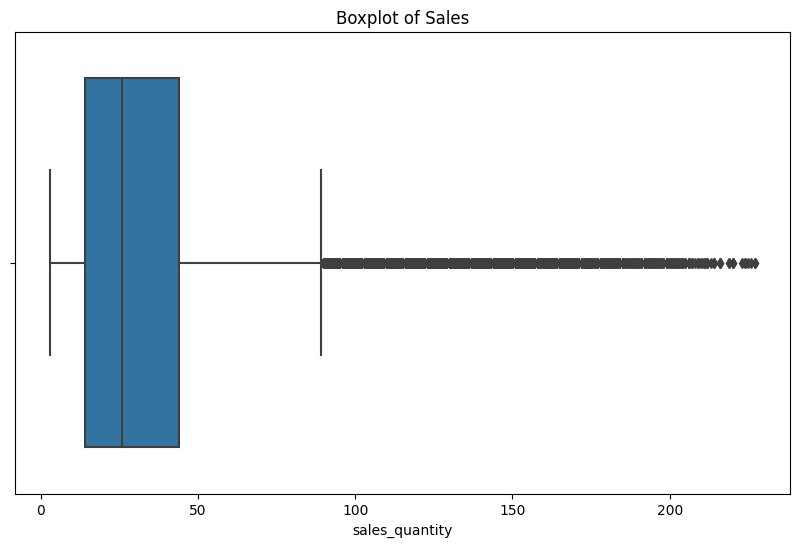

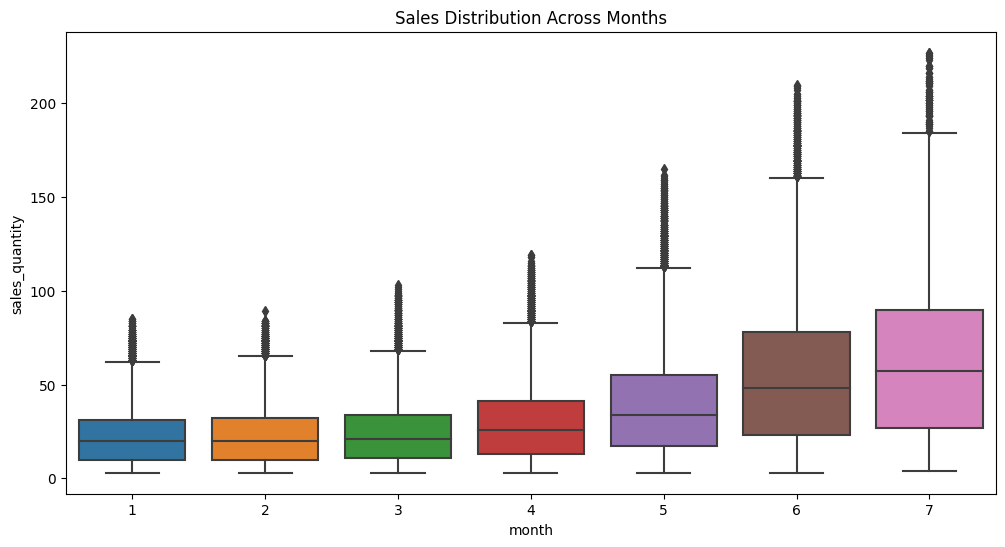

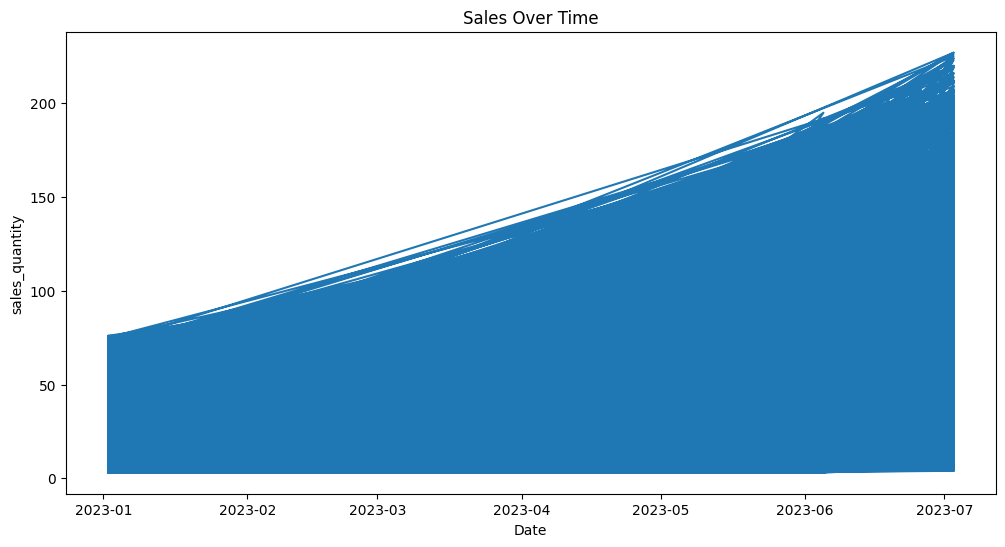

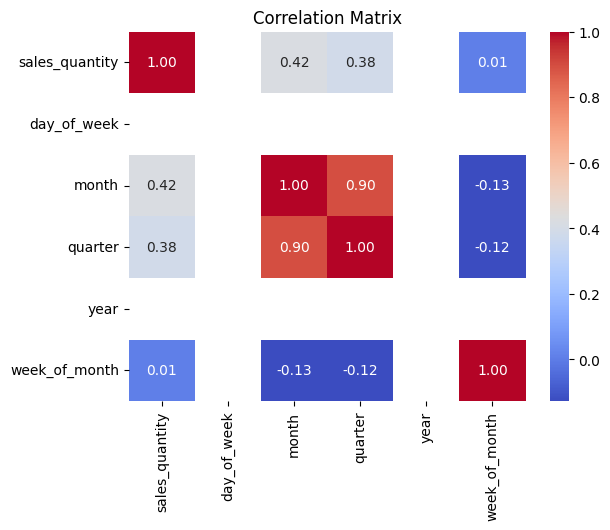

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called df
# Replace 'YourColumnName' with the actual column names in your dataset

# Display summary statistics
summary_stats = df.describe()
print(summary_stats)

# Identify outliers in the sales data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sales_quantity'])
plt.title('Boxplot of Sales')
plt.show()

# Examine the distribution of sales across different months
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'], y=df['sales_quantity'])
plt.title('Sales Distribution Across Months')
plt.show()

# Look for trends and seasonality in sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['week_start_date'], df['sales_quantity'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('sales_quantity')
plt.show()

# Assess the correlation between synthetic features and sales
correlation_matrix = df[['sales_quantity', 'day_of_week', 'month', 'quarter', 'year', 'week_of_month', ]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


       day_of_week          month        quarter      year  week_of_month
count     113400.0  113400.000000  113400.000000  113400.0  113400.000000
mean           0.0       3.592593       1.555556    2023.0       2.629630
std            0.0       1.831002       0.566560       0.0       1.280866
min            0.0       1.000000       1.000000    2023.0       1.000000
25%            0.0       2.000000       1.000000    2023.0       1.000000
50%            0.0       4.000000       2.000000    2023.0       3.000000
75%            0.0       5.000000       2.000000    2023.0       4.000000
max            0.0       7.000000       3.000000    2023.0       5.000000


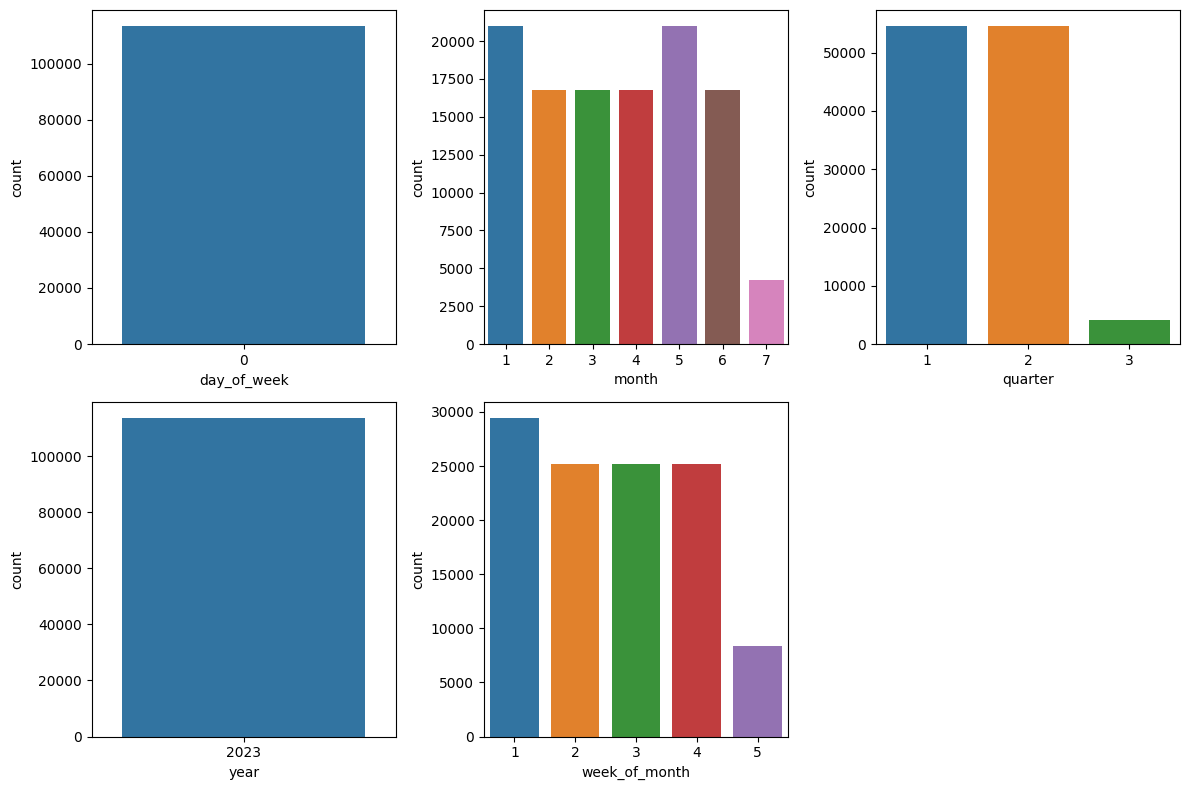

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df
# and you have synthetic features: 'day_of_week', 'month', 'quarter', 'year', 'week_of_month'

# Display summary statistics
summary_stats = df[['day_of_week', 'month', 'quarter', 'year', 'week_of_month']].describe()
print(summary_stats)

# Visualize distributions
plt.figure(figsize=(12, 8))

# Plot for 'day_of_week'
plt.subplot(2, 3, 1)
sns.countplot(x='day_of_week', data=df)

# Plot for 'month'
plt.subplot(2, 3, 2)
sns.countplot(x='month', data=df)

# Plot for 'quarter'
plt.subplot(2, 3, 3)
sns.countplot(x='quarter', data=df)

# Plot for 'year'
plt.subplot(2, 3, 4)
sns.countplot(x='year', data=df)

# Plot for 'week_of_month'
plt.subplot(2, 3, 5)
sns.countplot(x='week_of_month', data=df)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df
# and you have synthetic features: 'day_of_week', 'month', 'quarter', 'year', 'week_of_month'

# Display summary statistics
summary_stats = df[['day_of_week', 'month', 'quarter', 'year', 'week_of_month']].describe()

# Transpose the summary statistics for a better display
summary_stats_table = summary_stats.T

# Display the summary statistics table
print("Summary Statistics Table:")
print(summary_stats_table)


Summary Statistics Table:
                  count         mean       std     min     25%     50%  \
day_of_week    113400.0     0.000000  0.000000     0.0     0.0     0.0   
month          113400.0     3.592593  1.831002     1.0     2.0     4.0   
quarter        113400.0     1.555556  0.566560     1.0     1.0     2.0   
year           113400.0  2023.000000  0.000000  2023.0  2023.0  2023.0   
week_of_month  113400.0     2.629630  1.280866     1.0     1.0     3.0   

                  75%     max  
day_of_week       0.0     0.0  
month             5.0     7.0  
quarter           2.0     3.0  
year           2023.0  2023.0  
week_of_month     4.0     5.0  


In [ ]:
# Observations
# Identify outliers
outliers = df[df['sales_quantity'] > df['sales_quantity'].mean() + 3 * df['sales_quantity'].std()]

print("\nOutliers:",outliers.shape)



Outliers: (2076, 17)


In [ ]:
df.shape

(113400, 17)

In [ ]:
# Drop rows containing outliers
df = df.drop(outliers.index)

# Display information about the cleaned DataFrame
print("\nDataFrame after dropping outliers:")
print(df.info())


DataFrame after dropping outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111324 entries, 0 to 113399
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   week_start_date           111324 non-null  datetime64[ns]
 1   expected_rainfall         111324 non-null  float64       
 2   freezer_status            111324 non-null  int64         
 3   outlet_code               111324 non-null  int64         
 4   sales_quantity            111324 non-null  int64         
 5   day_of_week               111324 non-null  int64         
 6   month                     111324 non-null  int64         
 7   quarter                   111324 non-null  int64         
 8   year                      111324 non-null  int64         
 9   week_of_month             111324 non-null  int64         
 10  outlet_region_outstation  111324 non-null  uint8         
 11  outlet_region_upcountry   111

In [ ]:
df.shape

(111324, 17)

In [ ]:
# drop the specified columns 'rainfall_range_200+', 'day_of_week', 'year'
columns_to_drop = ['rainfall_range_200+', 'day_of_week', 'year', 'week_start_date']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150-200
0,57.00,1,3254,95,5,2,4,1,0,0,1,0,0
1,8.00,1,1859,107,5,2,5,1,0,0,1,0,0
2,170.57,1,4176,83,5,2,2,1,0,0,0,0,1
3,37.00,1,1459,106,5,2,4,1,0,0,1,0,0
4,7.00,1,38,43,3,1,4,1,0,0,1,0,0


In [ ]:
print(df.dtypes)

expected_rainfall           float64
freezer_status                int64
outlet_code                   int64
sales_quantity                int64
month                         int64
quarter                       int64
week_of_month                 int64
outlet_region_outstation      uint8
outlet_region_upcountry       uint8
outlet_region_western         uint8
rainfall_range_0-70           uint8
rainfall_range_70-150         uint8
rainfall_range_150-200        uint8
dtype: object


# Feture SelectionData



In [ ]:
X=df.drop(["sales_quantity"],axis=1)
y=df["sales_quantity"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
x_train

,expected_rainfall,freezer_status,outlet_code,month,quarter,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150-200
16952,99.73,1,2593,6,2,1,0,0,1,0,1,0
93414,68.00,1,1200,1,1,5,0,0,1,1,0,0
72985,28.00,1,1919,7,3,1,0,0,1,1,0,0
59766,36.00,0,3209,3,1,1,0,0,1,1,0,0
57578,64.00,1,1532,7,3,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21647,53.00,1,3009,5,2,1,1,0,0,1,0,0
46740,125.87,1,687,2,1,4,0,0,1,0,1,0
43410,33.00,1,1945,3,1,1,1,0,0,1,0,0
44383,8.00,0,2777,5,2,5,0,0,1,1,0,0


In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x_train, y_train)

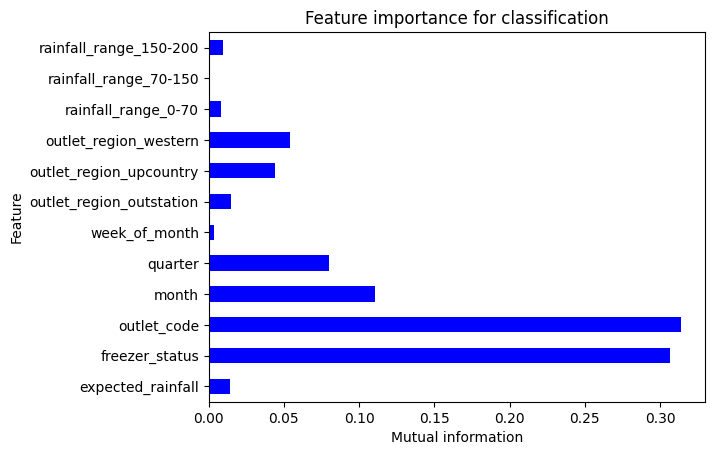

In [ ]:
featureimp = pd.Series(importances)
featureimp.index = x_train.columns
featureimp.plot(kind='barh', color='b')

plt.xlabel("Mutual information")
plt.ylabel("Feature")
plt.title("Feature importance for classification")
plt.show()

# Model Building

In [ ]:
# X_New=df.drop(["num_orders",'id','week'],axis=1)
# y_New=df["num_orders"]

X_New=df.drop(["sales_quantity",'outlet_code', 'rainfall_range_150-200', 'rainfall_range_70-150', 'rainfall_range_0-70', 'week_of_month'],axis=1)
y_New=df["sales_quantity"]

In [ ]:
x_train_New, x_test_New, y_train_New, y_test_New= train_test_split(X_New, y_New, test_size= 0.2, random_state=54)

In [ ]:
x_train_New

,expected_rainfall,freezer_status,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
105035,54.00,1,2,1,1,0,0
9439,178.80,1,4,2,1,0,0
92568,1.00,1,3,1,1,0,0
84414,144.94,0,2,1,1,0,0
8645,74.00,1,3,1,1,0,0
...,...,...,...,...,...,...,...
5250,196.93,1,6,2,1,0,0
62323,20.00,1,3,1,1,0,0
84312,49.00,1,1,1,0,0,1
107754,29.00,1,1,1,0,0,1


In [ ]:
x_test_New

,expected_rainfall,freezer_status,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
20034,5.00,1,4,2,1,0,0
58782,17.00,1,4,2,1,0,0
87176,52.00,1,3,1,1,0,0
14412,151.69,0,4,2,0,1,0
63401,65.00,0,5,2,1,0,0
...,...,...,...,...,...,...,...
96889,34.00,1,6,2,0,0,1
78144,37.00,0,3,1,1,0,0
3816,43.00,0,7,3,0,0,1
4888,125.72,1,4,2,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error
import numpy as np

In [ ]:
LinearRegressionModel= LinearRegression()
LinearRegressionModel.fit(x_train_New,y_train_New)

Linearreg = LinearRegressionModel.predict(x_test_New)

# Replace negative predictions with 0
Linearreg[Linearreg < 0] = 0

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    # Avoid division by zero by handling cases where y_true is 0
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mape = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

# Assuming Linearreg is the predicted values and y_test_New is the true values
mape_linear = calculate_mape(y_test_New, Linearreg)
print("MAPE for Linear Regression: ", mape_linear)


MAPE for Linear Regression:  52.1792706445819


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5)

# Fit the Random Forest model to the training data
random_forest_model.fit(x_train_New, y_train_New)

# Make predictions using the Random Forest model
random_forest_predictions = random_forest_model.predict(x_test_New)

# Replace negative predictions with 0
random_forest_predictions[random_forest_predictions < 0] = 0

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
  # Avoid division by zero by handling cases where y_true is 0
  mask = y_true != 0
  y_true = y_true[mask]
  y_pred = y_pred[mask]

  mape = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
  return mape

# Assuming random_forest_predictions is the predicted values and y_test_New is the true values
mape_random_forest = calculate_mape(y_test_New, random_forest_predictions)
print("MAPE for Random Forest Model: ", mape_random_forest)

MAPE for Random Forest Model:  40.39741934082181


# Test modification

In [ ]:
test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,7/10/2023,144.6mm,freezers available,outstation,outlet_code_1,NaN
1,7/10/2023,114.6mm,freezers available,western,outlet_code_10,NaN
2,7/10/2023,135.48mm,freezers available,western,outlet_code_100,NaN
3,7/10/2023,135.53mm,no freezers available,outstation,outlet_code_1000,NaN
4,7/10/2023,167.37mm,no freezers available,outstation,outlet_code_1001,NaN


In [ ]:
# Replacing values in freezer_status feature
test['freezer_status'] = test['freezer_status'].replace(['  freezers available ', ' freezers available ', '   freezers available '], 1)
test['freezer_status'] = test['freezer_status'].replace([' no freezers available '], 0)

# confirmation

print("Count of Unique freezer_status in test Dataset:", test['freezer_status'].nunique())
print("Unique freezer_status in test Dataset:", test['freezer_status'].unique())

Count of Unique freezer_status in test Dataset: 2
Unique freezer_status in test Dataset: [1 0]


In [ ]:
# Remove mm from expected_rainfall feture

test['expected_rainfall'] = test['expected_rainfall'].str.replace('mm', '').astype(float)
print(train.dtypes)

week_start_date      datetime64[ns]
expected_rainfall           float64
freezer_status                int64
outlet_region                object
outlet_code                  object
sales_quantity                int64
day_of_week                   int64
month                         int64
quarter                       int64
year                          int64
week_of_month                 int64
dtype: object


In [ ]:
test['week_start_date'] = pd.to_datetime(test['week_start_date'], format='%m/%d/%Y')
test['week_start_date'] = pd.to_datetime(test['week_start_date'])
test['day_of_week'] = test['week_start_date'].dt.dayofweek
test['month'] = test['week_start_date'].dt.month
test['quarter'] = test['week_start_date'].dt.quarter
test['year'] = test['week_start_date'].dt.year
test['week_of_month'] = test['week_start_date'].dt.day // 7 + 1

test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month
0,2023-07-10,144.60,1,outstation,outlet_code_1,NaN,0,7,3,2023,2
1,2023-07-10,114.60,1,western,outlet_code_10,NaN,0,7,3,2023,2
2,2023-07-10,135.48,1,western,outlet_code_100,NaN,0,7,3,2023,2
3,2023-07-10,135.53,0,outstation,outlet_code_1000,NaN,0,7,3,2023,2
4,2023-07-10,167.37,0,outstation,outlet_code_1001,NaN,0,7,3,2023,2


In [ ]:
test = pd.get_dummies(test, columns=['outlet_region'], prefix='outlet_region')

test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-07-10,144.60,1,outlet_code_1,NaN,0,7,3,2023,2,1,0,0
1,2023-07-10,114.60,1,outlet_code_10,NaN,0,7,3,2023,2,0,0,1
2,2023-07-10,135.48,1,outlet_code_100,NaN,0,7,3,2023,2,0,0,1
3,2023-07-10,135.53,0,outlet_code_1000,NaN,0,7,3,2023,2,1,0,0
4,2023-07-10,167.37,0,outlet_code_1001,NaN,0,7,3,2023,2,1,0,0


In [ ]:
test['outlet_code'] = test['outlet_code'].str.extract(r'(\d+)')

# Convert the extracted part to integer
test['outlet_code'] = test['outlet_code'].astype(int)

test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,2023-07-10,144.60,1,1,NaN,0,7,3,2023,2,1,0,0
1,2023-07-10,114.60,1,10,NaN,0,7,3,2023,2,0,0,1
2,2023-07-10,135.48,1,100,NaN,0,7,3,2023,2,0,0,1
3,2023-07-10,135.53,0,1000,NaN,0,7,3,2023,2,1,0,0
4,2023-07-10,167.37,0,1001,NaN,0,7,3,2023,2,1,0,0


In [ ]:
# Define rainfall bins
bins = [0, 70, 150, 200, float('inf')]  # Adjust the bin edges as needed
labels = ['0-70', '70-150', '150-200', '200+']

# Create a new column 'rainfall_range' with the corresponding labels
test['rainfall_range'] = pd.cut(test['expected_rainfall'], bins=bins, labels=labels, right=False)

test.head()


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range
0,2023-07-10,144.60,1,1,NaN,0,7,3,2023,2,1,0,0,70-150
1,2023-07-10,114.60,1,10,NaN,0,7,3,2023,2,0,0,1,70-150
2,2023-07-10,135.48,1,100,NaN,0,7,3,2023,2,0,0,1,70-150
3,2023-07-10,135.53,0,1000,NaN,0,7,3,2023,2,1,0,0,70-150
4,2023-07-10,167.37,0,1001,NaN,0,7,3,2023,2,1,0,0,150-200


In [ ]:
test = pd.get_dummies(test, columns=['rainfall_range'], prefix='rainfall_range')
test.head()

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,day_of_week,month,quarter,year,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150-200,rainfall_range_200+
0,2023-07-10,144.60,1,1,NaN,0,7,3,2023,2,1,0,0,0,1,0,0
1,2023-07-10,114.60,1,10,NaN,0,7,3,2023,2,0,0,1,0,1,0,0
2,2023-07-10,135.48,1,100,NaN,0,7,3,2023,2,0,0,1,0,1,0,0
3,2023-07-10,135.53,0,1000,NaN,0,7,3,2023,2,1,0,0,0,1,0,0
4,2023-07-10,167.37,0,1001,NaN,0,7,3,2023,2,1,0,0,0,0,1,0


In [ ]:
# drop the specified columns 'rainfall_range_200+', 'day_of_week', 'year'
columns_to_drop2 = ['rainfall_range_200+', 'day_of_week', 'year', 'week_start_date']

# Drop the specified columns
test = test.drop(columns=columns_to_drop2)

# Display the updated DataFrame
test.head()

,expected_rainfall,freezer_status,outlet_code,sales_quantity,month,quarter,week_of_month,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150-200
0,144.60,1,1,NaN,7,3,2,1,0,0,0,1,0
1,114.60,1,10,NaN,7,3,2,0,0,1,0,1,0
2,135.48,1,100,NaN,7,3,2,0,0,1,0,1,0
3,135.53,0,1000,NaN,7,3,2,1,0,0,0,1,0
4,167.37,0,1001,NaN,7,3,2,1,0,0,0,0,1


In [ ]:
print(test.dtypes)

expected_rainfall           float64
freezer_status                int64
outlet_code                   int64
sales_quantity              float64
month                         int64
quarter                       int64
week_of_month                 int64
outlet_region_outstation      uint8
outlet_region_upcountry       uint8
outlet_region_western         uint8
rainfall_range_0-70           uint8
rainfall_range_70-150         uint8
rainfall_range_150-200        uint8
dtype: object


In [ ]:
# Drop from feture selection

# drop the specified columns 'rainfall_range_200+', 'day_of_week', 'year'
columns_to_drop2 = ['sales_quantity','outlet_code', 'rainfall_range_150-200', 'rainfall_range_70-150', 'rainfall_range_0-70',  'week_of_month']

# Drop the specified columns
test = test.drop(columns=columns_to_drop2)

# Display the updated DataFrame
test.head()

,expected_rainfall,freezer_status,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,144.60,1,7,3,1,0,0
1,114.60,1,7,3,0,0,1
2,135.48,1,7,3,0,0,1
3,135.53,0,7,3,1,0,0
4,167.37,0,7,3,1,0,0


# Testing

In [ ]:
testTemp = pd.read_csv('/content/drive/MyDrive/Hackathon/test.csv')

In [ ]:
test.shape

(4200, 7)

In [ ]:
LinearregPred = LinearRegressionModel.predict(test)
LinearregPred[LinearregPred < 0] = 0
LinearregPred

array([53.84013623, 64.6537253 , 64.28753264, ..., 53.57496223,
       53.65125237, 25.37160496])

In [ ]:
LinearregPred.shape

(4200,)

In [ ]:
import numpy as np

lrp = {"outlet_code": testTemp["outlet_code"], "predicted_sales":np.rint(LinearregPred).astype(int) }
lrpdf = pd.DataFrame(lrp)
lrpdf

,outlet_code,predicted_sales
0,outlet_code_1,54
1,outlet_code_10,65
2,outlet_code_100,64
3,outlet_code_1000,25
4,outlet_code_1001,25
...,...,...
4195,outlet_code_995,65
4196,outlet_code_996,65
4197,outlet_code_997,54
4198,outlet_code_998,54


In [ ]:
lrpdf.to_csv('/content/drive/MyDrive/Hackathon/Test2/LinearRegression.csv', index = False)

In [ ]:
RandomForestRegressorPred = random_forest_model.predict(test)
RandomForestRegressorPred[RandomForestRegressorPred < 0] =0
RandomForestRegressorPred

array([57.73014805, 77.18444256, 77.12216807, ..., 57.73014805,
       57.73014805, 15.64925281])

In [ ]:
RandomForestRegressorPred.shape

(4200,)

In [ ]:
rfr= {"outlet_code": testTemp["outlet_code"], "predicted_sales":np.rint(RandomForestRegressorPred).astype(int) }
rfrdf = pd.DataFrame(rfr)
rfrdf


,outlet_code,predicted_sales
0,outlet_code_1,58
1,outlet_code_10,77
2,outlet_code_100,77
3,outlet_code_1000,16
4,outlet_code_1001,16
...,...,...
4195,outlet_code_995,77
4196,outlet_code_996,77
4197,outlet_code_997,58
4198,outlet_code_998,58


In [ ]:
rfrdf.to_csv('/content/drive/MyDrive/Hackathon/Test2/RandomForestRegressor.csv', index = False)

In [ ]:
test.head()

,expected_rainfall,freezer_status,month,quarter,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,144.60,1,7,3,1,0,0
1,114.60,1,7,3,0,0,1
2,135.48,1,7,3,0,0,1
3,135.53,0,7,3,1,0,0
4,167.37,0,7,3,1,0,0


In [ ]:
# import pickle

# with open('/content/drive/MyDrive/Hackathon/model.pkl', 'rb') as file:
#    model = pickle.load(file)

# evaluate model
# LogisticRegressionPred = model.predict(test)

In [ ]:
# LogisticRegressionPred